<a href="https://colab.research.google.com/github/Darwin-d/Pemrograman-Python/blob/main/Tugas14_1101181317_Darwindra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Darwindra**
---
**1101181317**
---
**Python G3**
---
**Tugas 14 (Wireless Modelling)**

In [2]:
import numpy as np
import matplotlib.pyplot as plt

**Fungsi COST 231**

In [3]:
def cos(frek, tipe, ht, hr, d):
  if frek in range(15, 1501):
    Ca = 69.55
    Cb = 26.16
  elif frek in range(1501, 2001):
    Ca = 46.3
    Cb = 33.9

  if tipe== 'urban' :
    Cm=0
  elif tipe=='suburban':
    Cm= -2*((np.log10((frek/28)**2))-5.4)
  elif tipe=='open' :
    Cm= -4.78*(np.log10(frek))+18.33*(np.log10(frek))-40.94
  else:
    Cm='tipe Salah'
  
  ahr = (1.1*np.log10(frek)-0.7)*hr-(1.56*np.log10(frek)-1.8)
  path_loss = Ca + (Cb*np.log10(frek))-(13.838*np.log(ht))-ahr+((44.9-6.55*np.log10(ht))*np.log10(d))-Cm

  return path_loss

**Fungsi Konversi**

In [4]:
# Fungsi untuk konversi

num_to_log = lambda x: 10*np.log10(x)

log_to_num = lambda x: 10 ** (x/10)

**Fungsi Daya Terima**

In [5]:
def daya_terima(Ptx, path_loss, Gtx, Grx):

  # konversi nilai numerik Ptx ke logaritmik
  Ptx_log = num_to_log(Ptx)

  # rumus daya terima
  p_terima = Ptx_log - path_loss + Gtx + Grx
  
  # Konversi daya terima ke numerik
  Prx = log_to_num(p_terima)
  return Prx

**Fungsi SNR**

In [6]:
def signal_to_noise (Prx, Bw):
  # noise dalam logaritmik
  noise_log = -174 + (10*np.log10(Bw))

  # noise dalam numerik
  noise = log_to_num(noise_log)
  SNR = Prx / noise
  return SNR

**Fungsi Kapasitas**

In [7]:
def kapasitas(SNR, Bw):
  cap_selular = Bw * np.log2(1 + SNR)
  return cap_selular

**Parameter**

In [8]:
frek1=700 #MHz
frek2=900 #MHz
frek=1800 #MHz
loc1='urban'
loc2='suburban'
loc3='open'
Ptx= 30 #Watt
Gtx= 10 #db
Grx= 2 #db
Bw = 5000000 #Hz
tower=80 #m
user=1.5 #m
dmin=200 #m
dmax=700 #m
N=200 #titik

**Daya terima berdasarkan lokasi**

In [9]:
d=np.random.randint(dmin,dmax,N)
d=d[np.argsort(d)]

#Urban
PlUrban=cos(frek,loc1,tower,user,d)
PlUrban=PlUrban[np.argsort(d)]
PrxUrban= daya_terima(Ptx, PlUrban, Gtx, Grx)

#Open
PlOpen= cos (frek,loc3, tower,user, d)
PlOpen= PlOpen[np.argsort(d)]
PrxOpen = daya_terima(Ptx, PlOpen, Gtx, Grx)

#Suburban
PlSuburban= cos (frek,loc2, tower,user, d)
PlSuburban= PlSuburban[np.argsort(d)]
PrxSuburban = daya_terima(Ptx, PlSuburban, Gtx, Grx)

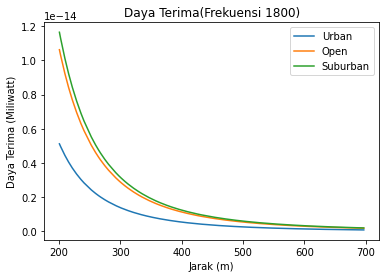

In [10]:
plt.figure("Frekuensi")
plt.plot(d,PrxUrban, label='Urban')
plt.plot(d,PrxOpen, label='Open')
plt.plot(d,PrxSuburban, label= 'Suburban')
plt.legend()
plt.title('Daya Terima(Frekuensi 1800)')
plt.xlabel('Jarak (m)')
plt.ylabel('Daya Terima (Miliwatt)')
plt.show()

**Daya Terima berdasarkan frekuensi**

In [11]:
#Frekuensi 700 Mhz
PlFrek1= cos(frek1,loc1,tower,user,d)
PlFrek1= PlFrek1[np.argsort(d)]
PrxFrek1= daya_terima(Ptx, PlFrek1, Gtx, Grx)

#Frekuensi 900 Mhz
PlFrek2= cos(frek2,loc1,tower,user,d)
PlFrek2= PlFrek2[np.argsort(d)]
PrxFrek2= daya_terima(Ptx, PlFrek2, Gtx, Grx)

#Frekuensi 1800 Mhz
PlFrek3= cos(frek,loc1, tower, user, d)
PlFrek3= PlFrek3[np.argsort(d)]
PrxFrek3= daya_terima(Ptx, PlFrek3, Gtx, Grx)

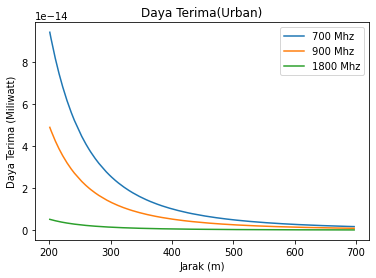

In [12]:
plt.figure()
plt.plot(d,PrxFrek1, label='700 Mhz')
plt.plot(d,PrxFrek2, label='900 Mhz')
plt.plot(d,PrxFrek3, label= '1800 Mhz')
plt.legend()
plt.title('Daya Terima(Urban)')
plt.xlabel('Jarak (m)')
plt.ylabel('Daya Terima (Miliwatt)')
plt.show()

**SNR berdasarkan lokasi**

In [13]:
SnrUrban = signal_to_noise(PrxUrban, Bw)
SnrOpen = signal_to_noise(PrxOpen, Bw)
SnrSuburban = signal_to_noise(PrxSuburban, Bw)

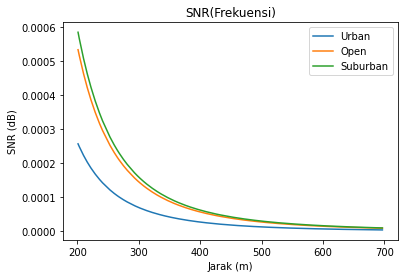

In [14]:
plt.figure('SNR Frekuensi')
plt.plot(d,SnrUrban, label='Urban')
plt.plot(d,SnrOpen, label='Open')
plt.plot(d,SnrSuburban, label= 'Suburban')
plt.legend()
plt.title('SNR(Frekuensi)')
plt.xlabel('Jarak (m)')
plt.ylabel('SNR (dB)')
plt.show()

**SNR berdasarkan frekuensi**

In [15]:
SnrFrek1= signal_to_noise(PrxFrek1, Bw)
SnrFrek2= signal_to_noise(PrxFrek2, Bw)
SnrFrek3= signal_to_noise(PrxFrek3, Bw)

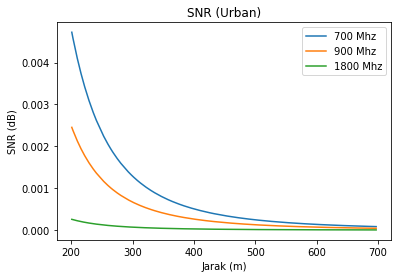

In [16]:
plt.figure("SNR Urban")
plt.plot(d,SnrFrek1, label='700 Mhz')
plt.plot(d,SnrFrek2, label='900 Mhz')
plt.plot(d,SnrFrek3, label= '1800 Mhz')
plt.legend()
plt.title('SNR (Urban)')
plt.xlabel('Jarak (m)')
plt.ylabel('SNR (dB)')
plt.show()

**Kapasitas seluler berdasarkan lokasi**

In [17]:
CapUrban =  kapasitas(SnrUrban, Bw)
CapOpen = kapasitas(SnrOpen, Bw)
CapSuburban = kapasitas(SnrSuburban, Bw)

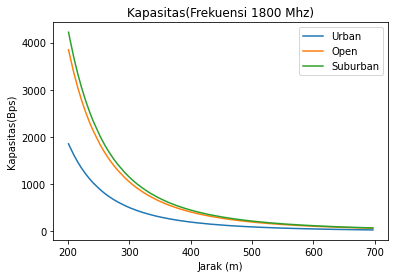

In [18]:
plt.figure('Kapasitas Frekuensi 1800 MhZ')
plt.plot(d,CapUrban, label='Urban')
plt.plot(d,CapOpen, label='Open')
plt.plot(d,CapSuburban, label= 'Suburban')
plt.legend()
plt.title('Kapasitas(Frekuensi 1800 Mhz)')
plt.xlabel('Jarak (m)')
plt.ylabel('Kapasitas(Bps)')
plt.show()

**Kapasitas Seluler berdasarkan frekuensi**

In [19]:
CapFrek1 = kapasitas(SnrFrek1,Bw)
CapFrek2 = kapasitas(SnrFrek2, Bw)
CapFrek3 = kapasitas(SnrFrek3, Bw)

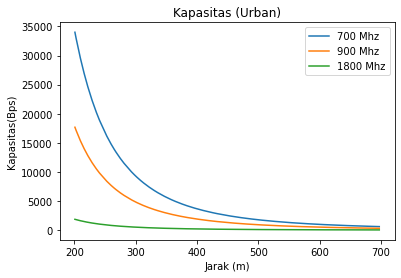

In [20]:
plt.figure('Kapasitas Urban')
plt.plot(d,CapFrek1, label='700 Mhz')
plt.plot(d,CapFrek2, label='900 Mhz')
plt.plot(d,CapFrek3, label= '1800 Mhz')
plt.legend()
plt.title('Kapasitas (Urban)')
plt.xlabel('Jarak (m)')
plt.ylabel('Kapasitas(Bps)')
plt.show()